# Moving Average Convergence Divergence Demo

In this notebook, we will demonstrate how the moving average convergence divergence (MACD) tool works. We will plot exponential moving average (EMA) lines of different periods, and see how they can be used to produce a new metric that can predict a crossover event.

[Moving Averages on Wikipedia](https://en.wikipedia.org/wiki/Moving_average)

[MACD](https://en.wikipedia.org/wiki/MACD)

## Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Exponential Moving Average (EMA) Functions

In [2]:
# Calculate the alpha value for a desired period.
def calculateAlpha(ema_period):
    alpha = 2.0 / (ema_period + 1)
    return alpha


# Returns the denominator
def getDenominator(number_of_terms):
    # bottom = 1 + (1-a) + (1-a)^2 + (1-a)^3 + ...
    a = calculateAlpha(number_of_terms)
    i = 0
    total = 0
    while i < number_of_terms:
        term = (1-a)**i
        total = total + term
        i = i + 1
    return total


# Returns the numerator
def getNumerator(price_data, price_data_index, number_of_terms):
    # top = p1 + (1-a)*p2 + (1-a)^2*p3 + (1-a)^3*p4 + ...
    a = calculateAlpha(number_of_terms)
    i = 0
    total = 0
    while i < number_of_terms:
        price = price_data[price_data_index - i]
        cof = (1-a)**i
        term = price * cof
        total = total + term
        i = i + 1
    return total


# Returns a single Exponential Moving Average value.
def getEMA(price_data, price_data_index, number_of_terms):
    #print("index:",price_data_index,"alpha:",alpha,"number_of_terms:",number_of_terms)
    if (number_of_terms - price_data_index) > 1:
        return 0
    else:
        top = getNumerator(price_data, price_data_index, number_of_terms)
        bottom = getDenominator(number_of_terms)
        EMA = top / bottom
        return EMA


# Returns a list of all EMA values.
def getEMAdataset(price_data, number_of_terms):
    ema_data = []
    i = 0
    while i < len(price_data):
        datum = getEMA(price_data, i, number_of_terms)
        ema_data.append(datum)
        i = i + 1
    return ema_data


## MACD Functions

In [3]:
# Find the difference between the two EMAs. EMA(12) - EMA(26) = MACD
def getMACDonly(ema_short_data, ema_long_data):
    result = ema_short_data - ema_long_data
    return result

# Find the EMA(9) of the MACD. This is called the MACD_signal
#TODO Make this compatible with ingesting a numpy array.

# A Fully formed function to produce MACD will 
#accept 3 inputs(ema_short_period, ema_long_period, ema_signal_period)
#def getMACD(signal_data, ema_short_period, ema_long_period, ema_signal_period):
#    ema_short_data = getEMAdataset(signal_data, ema_short_period)
#    ema_long_data  = getEMAdataset(signal_data, ema_long_period)
#    MACD = getMACDonly(ema_short_data, ema_long_data)
#    MACD_signal = getEMAdataset(MACD, ema_signal_period)
#    return ema_short_data, ema_long_data, MACD, MACD_signal

# The final data we want to produce is a bar chart where bar_height = MACD - MACD_signal

#signal_test = np.array([10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13]) # 12 terms
#ema_short_period = 3
#ema_long_period = 6
#ema_signal_period = 5
#my_short_data, my_long_data, myMACD, myMACD_signal = getMACD(signal_test, ema_short_period, ema_long_period, ema_signal_period)

## Plotting Function

In [4]:
# Plots 3 lines: raw data, EMA(period_1), EMA(period_2)
def calculateAndPlotEMA(data, ema_period_1, ema_period_2):
    ema_1 = getEMAdataset(data, ema_period_1)
    ema_2 = getEMAdataset(data, ema_period_2)
    x = np.arange(len(data))
    plt.plot(x, data)
    plt.plot(x, ema_1)
    plt.plot(x, ema_2)
    ema_legend_text_1 = "EMA(" + str(ema_period_1) + ")"
    ema_legend_text_2 = "EMA(" + str(ema_period_2) + ")"
    plt.legend(['Value', ema_legend_text_1, ema_legend_text_2])
    plt.title("Exponential Moving Averages")
    plt.show()

## Sine Wave Function

In [5]:
# Generates a sine wave.
def generateSineWave(period, amplitude, sigma, start, end):
    # Equations
    alpha = amplitude / 2.0
    beta = 2.0 * np.pi / period
    frequency = 1.0 / period
    x = np.arange(end + 1)
    
    # Formula
    y = alpha * np.sin(beta * x) + sigma
    return y

## Result Plots

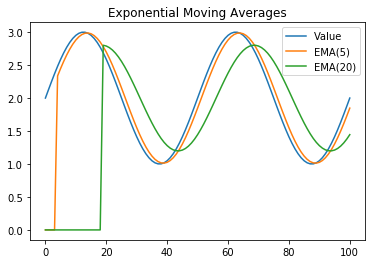

In [6]:
# Sine Wave Inputs
period = 50.0
amplitude = 2.0
sigma = 2.0
start = 0.0
end = 100.0
sineData = generateSineWave(period, amplitude, sigma, start, end)
calculateAndPlotEMA(sineData, 5, 20)

In the figure above, we use the same period (20) for both the SMA and EMA. We can see that the EMA tracks the Value signal with less lag than the SMA. This is because the EMA assigns more weight to the most recent values.

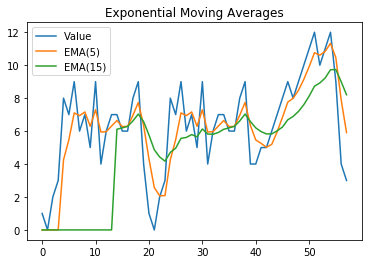

In [7]:
# Using some fictional data.
finalData = [1, 0, 2, 3, 8, 7, 9, 6, 7, 5, 9, 4, 6, 7, 7, 6, 6, 8, 9, 4, 
           1, 0, 2, 3, 8, 7, 9, 6, 7, 5, 9, 4, 6, 7, 7, 6, 6, 8, 9, 4,
           4, 5, 5, 6, 7, 8, 9, 8, 9, 10, 11, 12, 10, 11, 12, 9, 4, 3]
calculateAndPlotEMA(finalData, 5, 15)

## Function Testing Suite

In [8]:
# Testing Code

testData = [1, 0, 2, 3, 8]

test_bottom = getDenominator(3)
print("test_bottom:", test_bottom)

test_top = getNumerator(testData,2, 3)
print("test_top:", test_top)

test_alpha1 = calculateAlpha(9)
correctAns8 = 0.20
assert abs(test_alpha1 - correctAns8) < 0.001

short_data = np.array([10, 11, 10, 12])
long_data = np.array([8, 9, 9, 10])
MACD_test = getMACDonly(short_data, long_data)
print("MACD_test:", MACD_test)


print("ALL TESTS PASSED.")


test_bottom: 1.75
test_top: 2.25
MACD_test: [2 2 1 2]
ALL TESTS PASSED.
